In [1]:

import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

# remueve los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga el archivo CSV en un DataFrame
df_hom_kpi= pd.read_csv('..\data\df_homicidios.csv')

In [3]:

df_hom_kpi.sample(10)

,ID_HECHO,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,XY (CABA),LONGITUD,LATITUD,VEHICULO_ACUSADO
692,2021-0094,1,2021-12-20,1.0,AUTOPISTA,9.0,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,AUTO
695,2021-0097,1,2021-11-18,6.0,CALLE,1.0,Point (107664.16647795 104708.63962087),-58.379762,-34.586796,AUTO
546,2020-0026,1,2020-05-17,6.0,AUTOPISTA,14.0,NaN,NaN,NaN,OBJETO FIJO
485,2019-0069,1,2019-08-17,5.0,AVENIDA,4.0,Point (105355.77079994 99994.97457130),-58.404893,-34.629302,AUTO
158,2017-0021,1,2017-02-18,5.0,CALLE,1.0,Point (107308.24054153 102678.45528316),-58.383624,-34.605100,PASAJEROS
282,2018-0008,1,2018-01-12,17.0,AVENIDA,1.0,Point (108868.80749430 101370.51785663),-58.366597,-34.616878,CARGAS
581,2020-0061,1,2020-12-03,14.0,AUTOPISTA,13.0,Point (101287.58627255 109848.96522762),-58.449273,-34.540486,CARGAS
435,2019-0018,1,2019-03-03,23.0,AUTOPISTA,13.0,Point (101287.58627255 109848.96522762),-58.449273,-34.540486,AUTO
570,2020-0050,1,2020-11-01,22.0,AVENIDA,14.0,Point (103490.75904616 105613.31878847),-58.425255,-34.578663,MOTO
9,2016-0013,1,2016-02-10,11.0,AVENIDA,1.0,Point (106616.41069662 100496.44662323),-58.391149,-34.624774,AUTO


In [4]:
df_hom_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_HECHO          696 non-null    object 
 1   N_VICTIMAS        696 non-null    int64  
 2   FECHA             696 non-null    object 
 3   HORA              695 non-null    float64
 4   TIPO_DE_CALLE     696 non-null    object 
 5   COMUNA            696 non-null    float64
 6   XY (CABA)         682 non-null    object 
 7   LONGITUD          684 non-null    float64
 8   LATITUD           684 non-null    float64
 9   VEHICULO_ACUSADO  673 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 54.5+ KB



#### KPI Nro. 1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

Dato: censo 2022. Población total CABA: 3.120.612 - Fuente: https://censo.gob.ar/index.php/datos_provisionales/

In [5]:
# Filtrar los datos para el último semestre (julio - diciembre de 2021)
filtro_ultimo_semestre = (df_hom_kpi['FECHA'] >= '2021-07-01') & (df_hom_kpi['FECHA'] <= '2021-12-31')
df_ultimo_semestre = df_hom_kpi[filtro_ultimo_semestre]

# Filtrar los datos para el semestre anterior (enero - junio de 2021)
filtro_semestre_anterior = (df_hom_kpi['FECHA'] >= '2021-01-01') & (df_hom_kpi['FECHA'] <= '2021-06-30')
df_semestre_anterior = df_hom_kpi[filtro_semestre_anterior]

# Calcular el número de víctimas fatales en cada semestre
num_victimas_ultimo_semestre = df_ultimo_semestre['N_VICTIMAS'].sum()
num_victimas_semestre_anterior = df_semestre_anterior['N_VICTIMAS'].sum()

print("julio-diciembre 2021 :", num_victimas_ultimo_semestre, ("victimas"))
print("enero-junio 2021 :", num_victimas_semestre_anterior, ("victimas") )


julio-diciembre 2021 : 42 victimas
enero-junio 2021 : 55 victimas


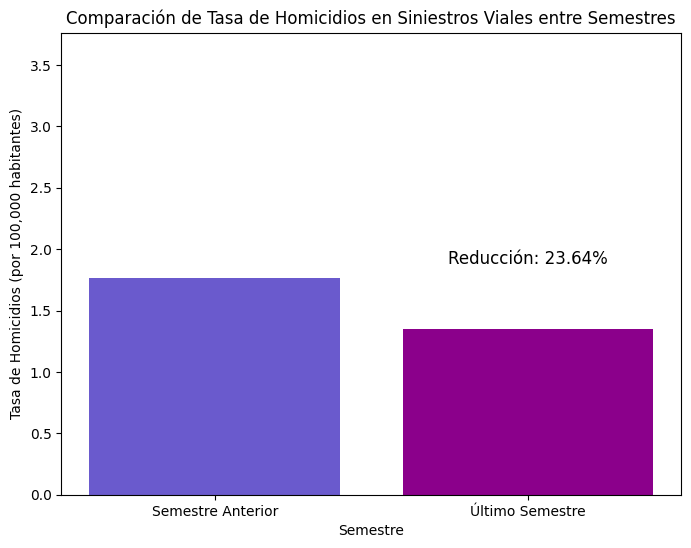

Se ha cumplido el objetivo de reducción del 10%.


In [6]:
# Datos
poblacion_total = 3120612
homicidios_ultimo_semestre = 42
homicidios_semestre_anterior = 55

# Calcular la tasa de homicidios en siniestros viales del último semestre
tasa_homicidios_ultimo_semestre = (homicidios_ultimo_semestre / poblacion_total) * 100000

# Calcular la tasa de homicidios en siniestros viales del semestre anterior
tasa_homicidios_semestre_anterior = (homicidios_semestre_anterior / poblacion_total) * 100000

# Calcular la diferencia porcentual
diferencia_porcentual = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100

# Graficar la diferencia porcentual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Semestre Anterior', 'Último Semestre'], [tasa_homicidios_semestre_anterior, tasa_homicidios_ultimo_semestre], color=["#6A5ACD", "#8B008B"])
plt.title('Comparación de Tasa de Homicidios en Siniestros Viales entre Semestres')
plt.xlabel('Semestre')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)')
plt.text(1, tasa_homicidios_ultimo_semestre + 0.5, f'Reducción: {diferencia_porcentual:.2f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.ylim(0, max(tasa_homicidios_ultimo_semestre, tasa_homicidios_semestre_anterior) + 2)
plt.show()

# Verificar si se cumplió la reducción del 10%
if diferencia_porcentual >= 10:
    print('Se ha cumplido el objetivo de reducción del 10%.')
else:
    print('No se ha cumplido el objetivo de reducción del 10%.')

Se crea un CSV con las variables, para trabajarlo en PowerBi

In [7]:
KPIs1 = {
    'Semestre': ['julio-diciembre 2021', 'enero-junio 2021'],
    'Número de Víctimas': [num_victimas_ultimo_semestre, num_victimas_semestre_anterior],
    'Tasa de Homicidios (por 100,000 habitantes)': [tasa_homicidios_ultimo_semestre, tasa_homicidios_semestre_anterior],
    'Diferencia Porcentual (%)': [diferencia_porcentual, None] 
}

KPIs1_df = pd.DataFrame(KPIs1)
KPIs1_df


,Semestre,Número de Víctimas,"Tasa de Homicidios (por 100,000 habitantes)",Diferencia Porcentual (%)
0,julio-diciembre 2021,42,1.345890,23.636364
1,enero-junio 2021,55,1.762475,NaN


In [53]:
# Guardamos el DF listo para su análisis
KPIs1_df.to_csv('../data/df_kpi1.csv',index=False)



#### KPI 2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

In [8]:
df_vic_hom_kpi= pd.read_csv('..\data\df_vic_hom.csv')

In [9]:
df_vic_hom_kpi['FECHA'] = df_vic_hom_kpi['FECHA'].astype('datetime64[ns]')

In [10]:
# Filtrar los datos para el año anterior.
filtro_anterior = ((df_vic_hom_kpi['FECHA'].dt.year) == (2021 - 1))
df_anterior = df_vic_hom_kpi[filtro_anterior]
#df_hom['FECHA'].dt.year

In [11]:
df_vic_hom_kpi.sample(3)

,ID_HECHO,FECHA,ROL_VICTIMA,VEHICULO_VICTIMA,SEXO_VICTIMA,GRAVEDAD,RANGO_ETARIO
416,2018-0126,2018-11-18,CONDUCTOR,MOTO,MASCULINO,FATAL,2_ 18 a 29 años
451,2019-0016,2019-02-24,CONDUCTOR,MOTO,MASCULINO,FATAL,4_ 45 a 49 años
84,2016-0110,2016-08-24,PEATON,PEATON,MASCULINO,FATAL,5_ 50 a 59 años


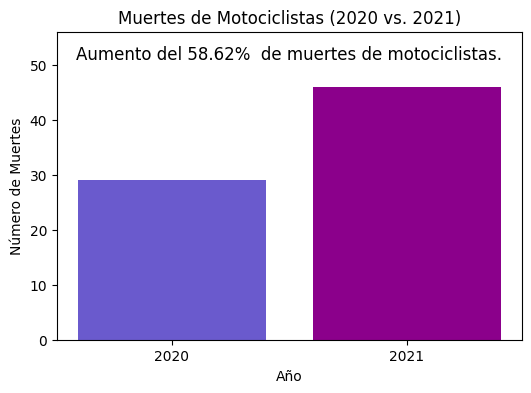

No se ha cumplido el objetivo de reducción del 7%.


In [12]:
# Filtrar los datos para el año anterior.
filtro_anterior = ((df_vic_hom_kpi['FECHA'].dt.year) == (2021 - 1))
df_anterior = df_vic_hom_kpi[filtro_anterior]
#df_hom['FECHA'].dt.year
# Filtrar los datos para el año actual.
filtro_actual = ((df_vic_hom_kpi['FECHA'].dt.year) == 2021)
df_actual = df_vic_hom_kpi[filtro_actual]

# Contar el número de muertes de motociclistas para el año anterior y actual.
muertes_anterior = df_anterior[df_anterior['VEHICULO_VICTIMA'] == 'MOTO'].shape[0]
muertes_actual = df_actual[df_actual['VEHICULO_VICTIMA'] == 'MOTO'].shape[0]

# Calcular el porcentaje de cambio.
porcentaje_cambio = ((muertes_actual - muertes_anterior) / muertes_anterior) * 100

# Graficar los resultados.
plt.figure(figsize=(6, 4))
plt.bar(['2020', '2021'], [muertes_anterior, muertes_actual], color=["#6A5ACD", "#8B008B"])
plt.title('Muertes de Motociclistas (2020 vs. 2021)')
plt.xlabel('Año')
plt.ylabel('Número de Muertes')
plt.ylim(0, max(muertes_anterior, muertes_actual) + 10)

# Mostrar el resultado de forma genérica
if porcentaje_cambio <= -7:
    mensaje = f'Reducción del {abs(porcentaje_cambio):.2f}%  de muertes de motociclistas.'
else:
    mensaje = f'Aumento del {abs(porcentaje_cambio):.2f}%  de muertes de motociclistas.'

plt.annotate(mensaje, (0.5, max(muertes_anterior, muertes_actual) + 5), ha='center', fontsize=12)
plt.show()

# Verificar si se cumplió la reducción del 7%
if porcentaje_cambio <= -7:
    print('Se ha cumplido el objetivo de reducción del 7%.')
else:
    print('No se ha cumplido el objetivo de reducción del 7%.')

In [13]:
# Filtrar los datos para el año 2020.
filtro_2020 = (df_vic_hom_kpi['FECHA'].dt.year == 2020)
df_2020 = df_vic_hom_kpi[filtro_2020]

# Filtrar los datos para el año 2021.
filtro_2021 = (df_vic_hom_kpi['FECHA'].dt.year == 2021)
df_2021 = df_vic_hom_kpi[filtro_2021]

# Contar el número total de muertes en 2020 y 2021.
total_muertes_2020 = df_2020.shape[0]
total_muertes_2021 = df_2021.shape[0]

# Calcular el porcentaje de cambio.
porcentaje_cambio = ((total_muertes_2021 - total_muertes_2020) / total_muertes_2020) * 100

# Imprimir el porcentaje de muertes en 2020 y 2021, así como la diferencia.
print(f'Porcentaje de muertes en 2020: {total_muertes_2020 / (total_muertes_2020 + total_muertes_2021) * 100:.2f}%')
print(f'Porcentaje de muertes en 2021: {total_muertes_2021 / (total_muertes_2020 + total_muertes_2021) * 100:.2f}%')
print(f'Diferencia en porcentaje entre 2020 y 2021: {porcentaje_cambio:.2f}%')

Porcentaje de muertes en 2020: 45.51%
Porcentaje de muertes en 2021: 54.49%
Diferencia en porcentaje entre 2020 y 2021: 19.75%



Creación de un DF para transformarlo en un csv con las variables calculadas para graficar en PowerBI.

In [14]:
# Filtrar los datos para el año anterior.
filtro_anterior = (df_vic_hom_kpi['FECHA'].dt.year == (2021 - 1))
df_anterior = df_vic_hom_kpi[filtro_anterior]

# Filtrar los datos para el año actual.
filtro_actual = (df_vic_hom_kpi['FECHA'].dt.year == 2021)
df_actual = df_vic_hom_kpi[filtro_actual]

# Contar el número de muertes de motociclistas para el año anterior y actual.
muertes_anterior = df_anterior[df_anterior['VEHICULO_VICTIMA'] == 'MOTO'].shape[0]
muertes_actual = df_actual[df_actual['VEHICULO_VICTIMA'] == 'MOTO'].shape[0]

# Calcular el porcentaje de cambio.
porcentaje_cambio = ((muertes_actual - muertes_anterior) / muertes_anterior) * 100

# DataFrame reducido con las variables necesarias
data = {
    'año': ['2020', '2021'],
    'muertes_motociclistas ': [muertes_anterior, muertes_actual],
    'porcentaje_cambio': [porcentaje_cambio, porcentaje_cambio],  # se agrega el mismo valor para ambos años
}

df_kPI2 = pd.DataFrame(data)


df_kPI2


,año,muertes_motociclistas,porcentaje_cambio
0,2020,29,58.62069
1,2021,46,58.62069


In [52]:
# Guardamos el DF listo para su análisis
df_kPI2.to_csv('../data/df_kpi2.csv',index=False)

#### KPI 3 (propuesta)

Reducir en un 5% la cantidad de accidentes mortales de autos en el último semestre del año 2021, respecto al semestre anterior

In [15]:
df_vic_hom_kpi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          717 non-null    object        
 1   FECHA             717 non-null    datetime64[ns]
 2   ROL_VICTIMA       706 non-null    object        
 3   VEHICULO_VICTIMA  708 non-null    object        
 4   SEXO_VICTIMA      711 non-null    object        
 5   GRAVEDAD          717 non-null    object        
 6   RANGO_ETARIO      664 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 39.3+ KB


In [16]:
df_hom_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_HECHO          696 non-null    object 
 1   N_VICTIMAS        696 non-null    int64  
 2   FECHA             696 non-null    object 
 3   HORA              695 non-null    float64
 4   TIPO_DE_CALLE     696 non-null    object 
 5   COMUNA            696 non-null    float64
 6   XY (CABA)         682 non-null    object 
 7   LONGITUD          684 non-null    float64
 8   LATITUD           684 non-null    float64
 9   VEHICULO_ACUSADO  673 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 54.5+ KB


No se ha cumplido el objetivo de reducción del 5%.


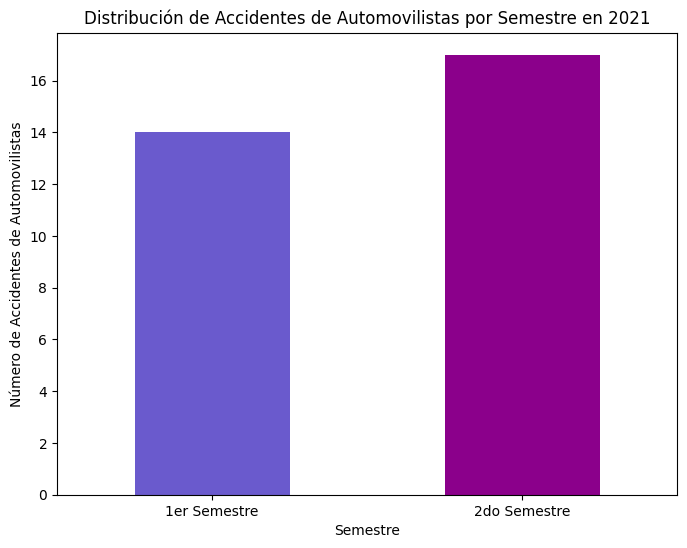

In [17]:
df_hom_kpi['FECHA'] = pd.to_datetime(df_hom_kpi['FECHA'])

# Filtrar los datos para incluir solo registros del año 2021 y víctimas que sean automovilistas
df_2021_autos = df_hom_kpi[(df_hom_kpi['FECHA'].dt.year == 2021) & (df_hom_kpi['VEHICULO_ACUSADO'] == 'AUTO')]

# Crear una nueva columna "semestre" basada en la fecha
df_2021_autos['semestre'] = df_2021_autos['FECHA'].apply(lambda x: '1er Semestre' if x.month <= 6 else '2do Semestre')

# Calcular la distribución de accidentes por semestre
distribucion_semestre = df_2021_autos['semestre'].value_counts().sort_index()

# Definir colores para cada semestre
colores = ["#6A5ACD", "#8B008B"]

# Graficar la distribución por semestre
plt.figure(figsize=(8, 6))
distribucion_semestre.plot(kind='bar', color=colores)
plt.xlabel('Semestre')
plt.ylabel('Número de Accidentes de Automovilistas')
plt.title('Distribución de Accidentes de Automovilistas por Semestre en 2021')
plt.xticks(rotation=0)

# Calcular el objetivo (reducción del 5%)
objetivo = distribucion_semestre['1er Semestre'] * 0.95  # Reducción del 5%

# Verificar si se cumple el objetivo
if distribucion_semestre['2do Semestre'] <= objetivo:
    print('Se ha cumplido el objetivo de reducción del 5%.')
else:
    print('No se ha cumplido el objetivo de reducción del 5%.')
    
plt.show()

In [18]:
diferencia_porcentaje = ((distribucion_semestre['2do Semestre'] - distribucion_semestre['1er Semestre']) / distribucion_semestre['1er Semestre']) * 100

# Mostrar la diferencia en porcentaje 
print(f'Diferencia en porcentaje entre el 1er y 2do semestre: {diferencia_porcentaje:.2f}%')

# Verificar si se cumple el objetivo (reducción del 5%)
if diferencia_porcentaje <= -5.0:
    print('Se ha cumplido el objetivo de reducción del 5%.')
else:
    print('No se ha cumplido el objetivo de reducción del 5%.')

Diferencia en porcentaje entre el 1er y 2do semestre: 21.43%
No se ha cumplido el objetivo de reducción del 5%.


In [19]:
data = {
    'Semestre': distribucion_semestre.index,
    'Numero_Accidentes': distribucion_semestre.values,
}
df_KPI_3 = pd.DataFrame(data)
df_KPI_3

,Semestre,Numero_Accidentes
0,1er Semestre,14
1,2do Semestre,17


In [50]:
# Guardamos el DF listo para su análisis
df_KPI_3.to_csv('../data/df_kpi3.csv',index=False)